In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Example Clean Image')

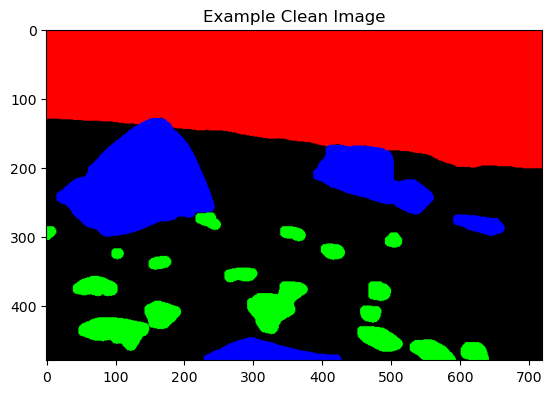

In [46]:
example = plt.imread('clean0015.png')
plt.imshow(example)
plt.title("Example Clean Image")

In [5]:
df = pd.read_csv('images_summary.csv')
df = df.drop(columns = 'Unnamed: 0')

In [6]:
df

,image,reds,greens,blues,blacks
0,clean5687.png,45185,1178,1035,298202
1,clean0259.png,30097,0,0,315503
2,clean3816.png,54816,9340,5425,276019
3,clean9485.png,121909,0,1107,222584
4,clean1576.png,37348,15660,4957,287635
...,...,...,...,...,...
9761,clean7704.png,97538,5316,8658,234088
9762,clean8991.png,16295,12701,0,316604
9763,clean2060.png,139448,1166,2430,202556
9764,clean8331.png,47971,3925,1773,291931


In [7]:
melted = df.melt(id_vars = ['image'], value_vars = ['reds', 'greens', 'blues', 'blacks'], var_name = 'pixel_cat')

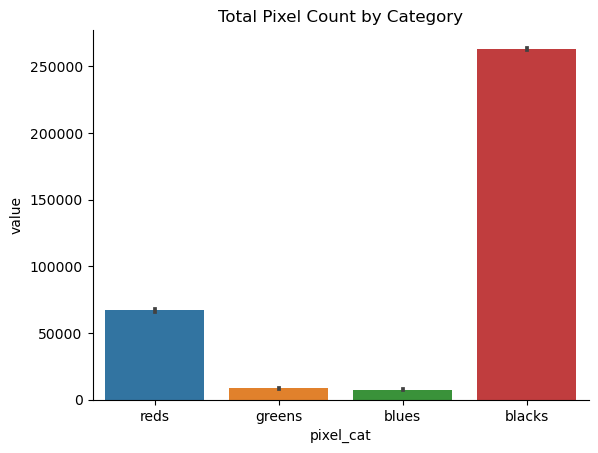

In [22]:
palette = {
    'reds':'light_coral',
    'greens':'lightgreen',
    'blues':'mediumturquoise',
    'blacks':'slategray'
}
fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(data = melted, x = 'pixel_cat', y = 'value')
ax.set_title('Total Pixel Count by Category')
sns.despine()

In [25]:
df['reds_perc'] = df.apply(lambda x: x.reds/(x.reds+x.blues+x.greens+x.blacks), axis = 1)
df['blues_perc'] = df.apply(lambda x: x.blues/(x.reds+x.blues+x.greens+x.blacks), axis = 1)
df['blacks_perc'] = df.apply(lambda x: x.blacks/(x.reds+x.blues+x.greens+x.blacks), axis = 1)
df['greens_perc'] = df.apply(lambda x: x.greens/(x.reds+x.blues+x.greens+x.blacks), axis = 1)

melted_perc = df.melt(id_vars = ['image'], value_vars = ['reds_perc', 'greens_perc', 'blues_perc', 'blacks_perc'], var_name = 'pixel_cat')

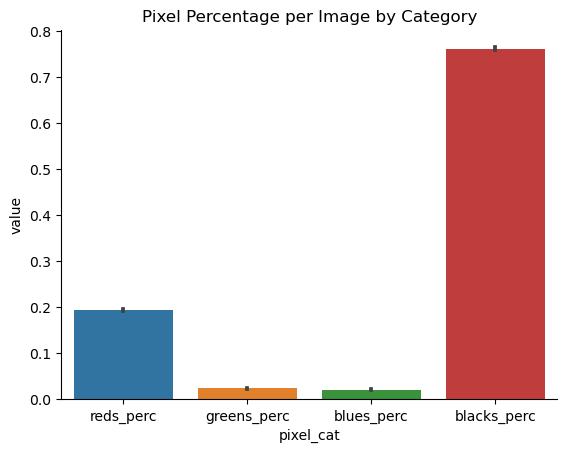

In [47]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(data = melted_perc, x = 'pixel_cat', y = 'value')
ax.set_title('Pixel Percentage per Image by Category')
sns.despine()

In [39]:
df['has_reds'] = df.reds > 0
df['has_greens'] = df.greens > 0
df['has_blues'] = df.blues > 0
df['has_blacks'] = df.blacks > 0
num_images = df.groupby('image').count().shape[0]
num_images
dat = df.sum()[['has_reds', 'has_greens', 'has_blues', 'has_blacks']]/num_images * 100

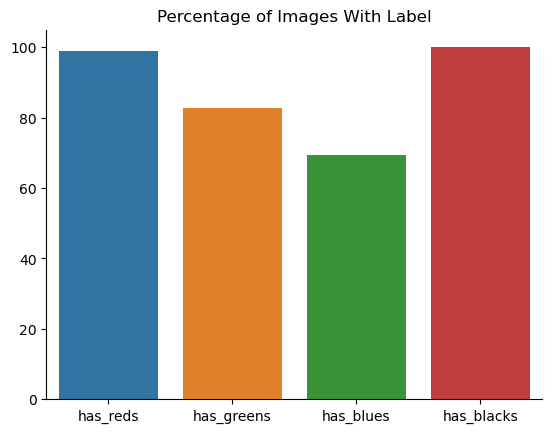

In [43]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.barplot(x = dat.index, y = dat.values)
ax.set_title('Percentage of Images With Label')
sns.despine()